# Seaborn
* 1- Distribution Plots
    * distplot
    * jointplot
    * pairplot
    * rugplot
    * kdeplot
* 2- Categorical Data Plots
    * factorplot
    * boxplot
    * violinplot
    * stripplot
    * swarmplot
    * barplot
    * countplot
* 3- Matrix Plots
    * Heatmap

## 1- Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

### Imports

In [1]:
import seaborn as sns
%matplotlib inline

### Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### distplot

The distplot shows the distribution of a univariate set of observations.

Univariate Distruibution:
In statistics, a univariate distribution is a probability distribution of only one random variable

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

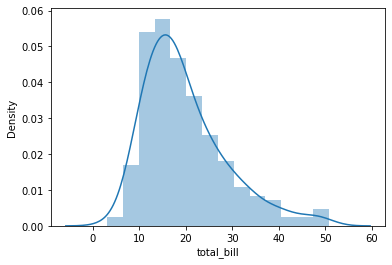

In [8]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

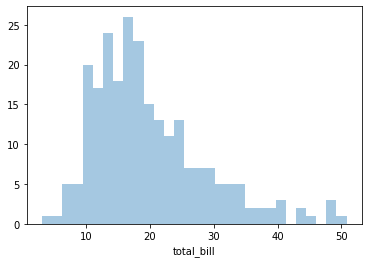

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

### jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

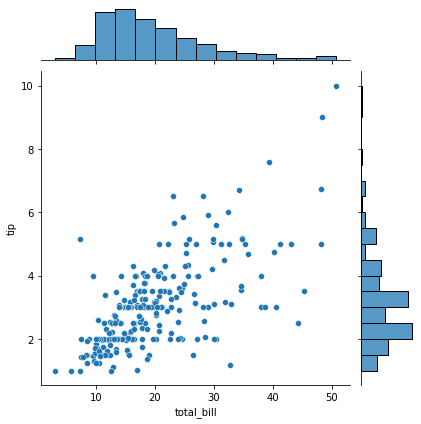

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

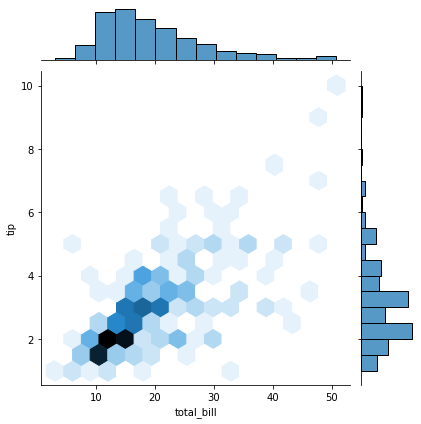

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

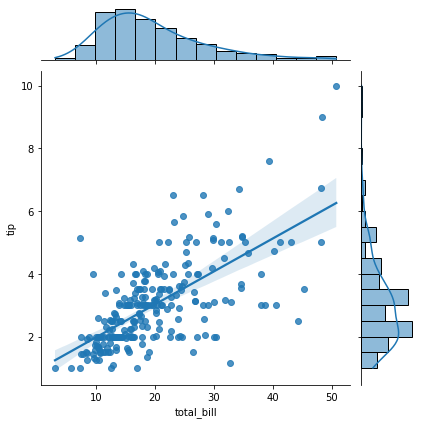

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

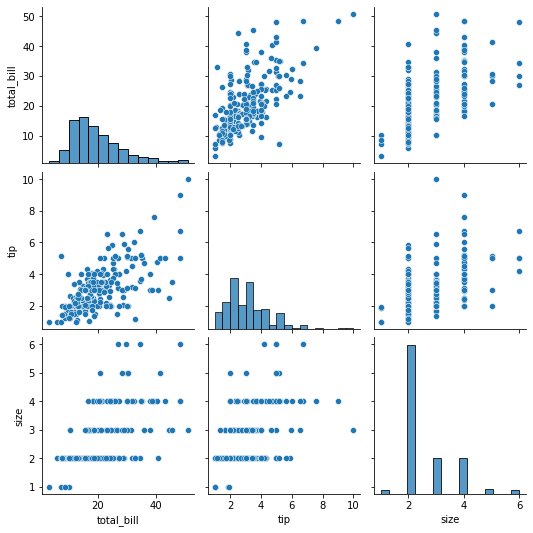

In [13]:
sns.pairplot(tips)

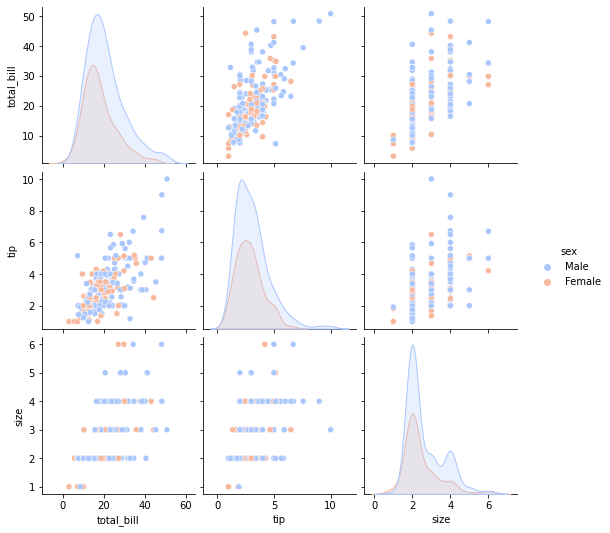

In [14]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

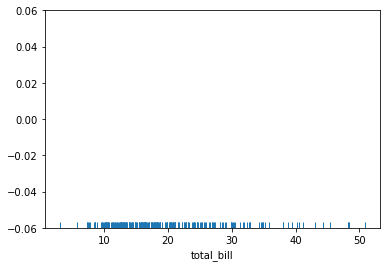

In [15]:
sns.rugplot(tips['total_bill'])

### kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

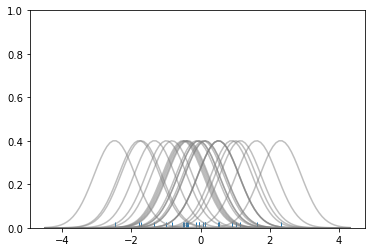

In [17]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

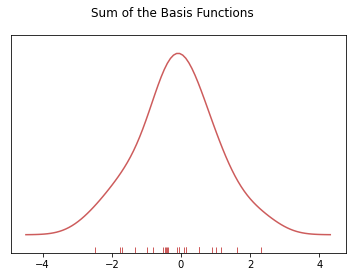

In [18]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

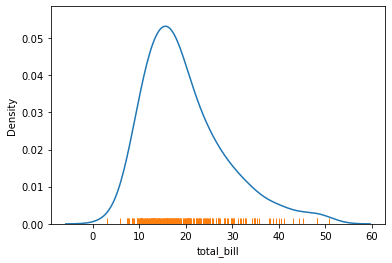

In [19]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

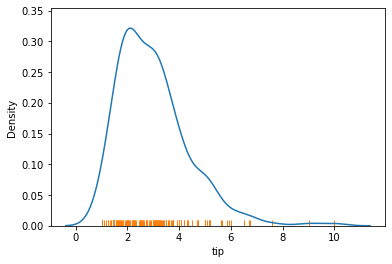

In [20]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## 2- Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [21]:
import seaborn as sns
%matplotlib inline

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

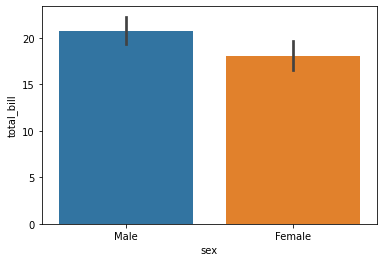

In [23]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [24]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

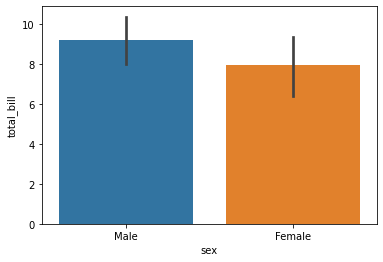

In [25]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

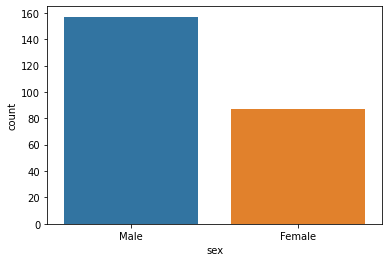

In [26]:
sns.countplot(x='sex',data=tips)

### boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

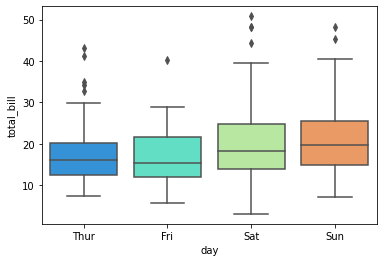

In [27]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:>

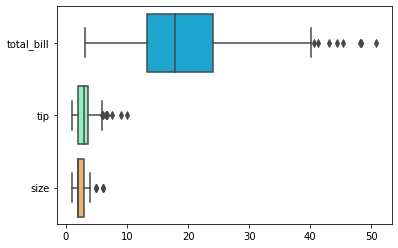

In [28]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

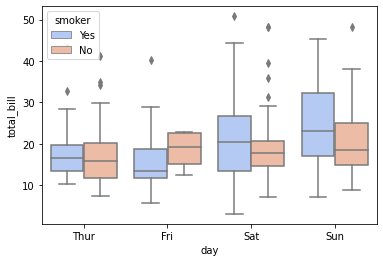

In [29]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

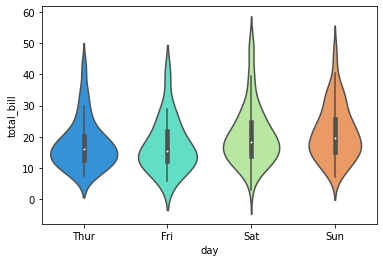

In [30]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

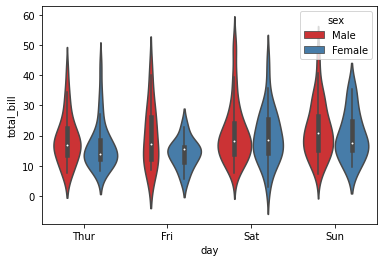

In [31]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

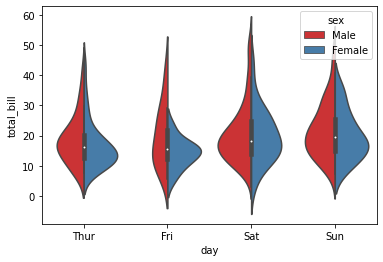

In [32]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

### stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

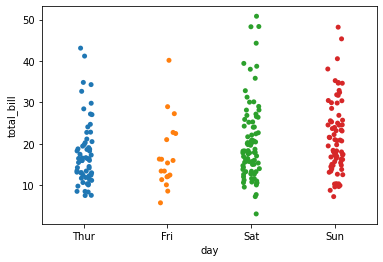

In [33]:
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

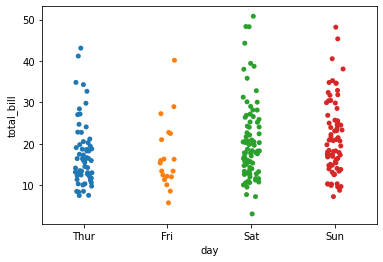

In [34]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

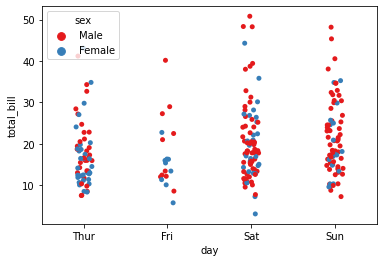

In [35]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

C:\anaconda3\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

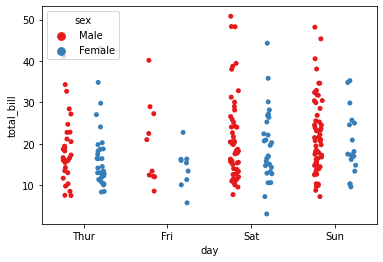

In [36]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

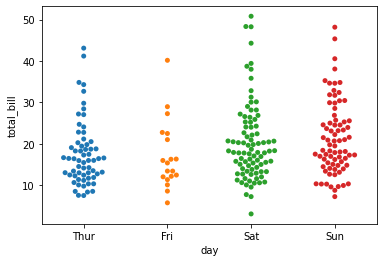

In [37]:
sns.swarmplot(x="day", y="total_bill", data=tips)

C:\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

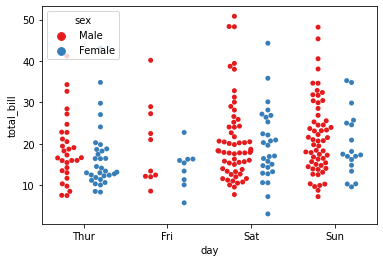

In [38]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combining Categorical Plots

<AxesSubplot:xlabel='tip', ylabel='day'>

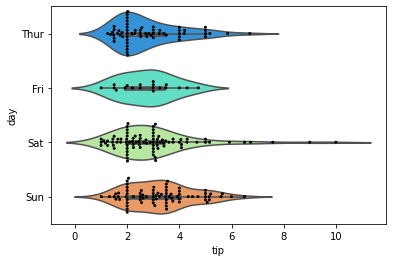

In [39]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

### factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

In [ ]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

## 3- Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

In [ ]:
flights.head()

### Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [ ]:
tips.head()

In [ ]:
# Matrix form for correlation data
tips.corr()

In [ ]:
sns.heatmap(tips.corr())

In [ ]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [ ]:
flights.pivot_table(values='passengers',index='month',columns='year')

In [ ]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

In [ ]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)